# Chapter 2: Toolbox for Data Scientists  

Let's start with playing around with our first notebook. I will be showing the basics off in Jupyter Lab, but the same tasks could be completed using jupyter notebook, Google Colab, Deepnote, or Github Codespaces. 


## Getting Started 

Let’s start with the first code and import a few libraries that will be helpful.
After typing in the code, the cell can be executed by pressing the Ctrl+Enter or SHIFT+Enter keys

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Data Frames

* A key feature of `pandas` is a fast and efficient DataFrame object for data manipulation 
* A DataFrame is a tabular data structure, with rows and columns
* Let’s learn about DataFrames with some examples 



### Example 1

In this example, we use the `pandas` `DataFrame` object constructor with a dictionary of lists as argument. The value of each entry in the dictionary is the name of the column, and the lists are their values.
The `DataFrame` columns can be arranged at construction time by entering a keyword *columns* with a list of the names of the columns ordered as we want. What if the *column* keyword is not used?

In [2]:
# Our first DataFrame, constructed with a dictionary of lists 
data = {
    'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
    'team': [
        'FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid',
        'RMadrid', 'ValenciaCF', 'ValenciaCF', 'ValenciaCF'
    ],
    'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
    'draws': [6, 7, 4, 5, 4, 7, 8, 10, 8],
    'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
}
football = pd.DataFrame(data)
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


The result is a table where each entry in the dictionary is a column. The index of each row is created automatically taking the position of its elements inside the entry lists, starting from 0. Although it is very easy to create DataFrames from scratch, most of the time what we will need to do is import chunks of data into a DataFrame structure, we will see how to do this in later examples.

In [3]:
# create data frame with reordered columns 
# the new table "football2" should have columns of: 
#   team, year, wins, losses, draws
football2 = football[['team', 'year', 'wins', 'losses', 'draws']]
football2

,team,year,wins,losses,draws
0,FCBarcelona,2010,30,2,6
1,FCBarcelona,2011,28,3,7
2,FCBarcelona,2012,32,2,4
3,RMadrid,2010,29,4,5
4,RMadrid,2011,32,2,4
5,RMadrid,2012,26,5,7
6,ValenciaCF,2010,21,9,8
7,ValenciaCF,2011,17,11,10
8,ValenciaCF,2012,19,11,8


### Example 2 

Let's look at another small DataFrame 

In [4]:
country_data = {
    'country': ['Canada', 'USA', 'Mexico', 'India', 'Singapore', 'China'],
    'capital': [
        'Ottawa', 'Washington', 'Mexico City', 'New Delhi', 'Singapore', 'Beijing'
    ],
    'population': [37.0, 327.2, 130.8, 1356.5, 5.8, 1415.0]
}
myworld = pd.DataFrame(country_data)

# view the DataFrame 
print(myworld)

     country      capital  population
0     Canada       Ottawa        37.0
1        USA   Washington       327.2
2     Mexico  Mexico City       130.8
3      India    New Delhi      1356.5
4  Singapore    Singapore         5.8
5      China      Beijing      1415.0


In [5]:
# we can also see the DataFrame just calling the DataFrame variable
myworld

,country,capital,population
0,Canada,Ottawa,37.0
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8
5,China,Beijing,1415.0


Notice the difference in printing out the DataFrame using the explicit `print` function or listing the variable itself. 

Let's now try to slice and access different elements form the DataFrame

Pandas has also assigned a "key" for each row, in this case, with numerical values from 0 through 5. You can access a subset of rows (observations) using square brackets.

In [6]:
myworld[0:4]

,country,capital,population
0,Canada,Ottawa,37.0
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5


In [7]:
# Examine the "capital" column of the myworld DataFrame 
capitals = myworld['capital']

Note, what is printed out - whether the range of values is inclusive or exclusive. 

If you only want one column from a DataFrame, you can put the column name in square brackets. The result will be a Data Series data object (not a Data Frame) because only one column is retrieved.

In [8]:
type(capitals)

pandas.core.series.Series

In [9]:
type(myworld)

pandas.core.frame.DataFrame

In [10]:
# Select three columns from the original data
#  country, capital, and population
myworld['country', 'capital', 'population']

KeyError: ('country', 'capital', 'population')

**NOTE**  
What is the issue?   

It is trying to select a column that is a combination of the three columns, we want to select each individually. 

When selecting multiple columns using their names, put all the columns desired to be selected into a list.  

In [11]:
myworld[['country', 'capital', 'population']]

,country,capital,population
0,Canada,Ottawa,37.0
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8
5,China,Beijing,1415.0


In [12]:
temp = ['country', 'capital', 'population']
type(temp)

list

Let's work on a larger data set that we import from a csv file. 

### Example 3

First, we need to read in the .csv file. 


**NOTE**  
The file population.csv must be in the same folder as the notebook file, otherwise you would need to specify some path information.  


In [13]:
pop = pd.read_csv('population.csv')
pop

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932
1,Arab World,ARB,1961,95044497
2,Arab World,ARB,1962,97682294
3,Arab World,ARB,1963,100411076
4,Arab World,ARB,1964,103239902
...,...,...,...,...
15142,Zimbabwe,ZWE,2013,15054506
15143,Zimbabwe,ZWE,2014,15411675
15144,Zimbabwe,ZWE,2015,15777451
15145,Zimbabwe,ZWE,2016,16150362


We can use the `head()` funciton to look at the first few rows, and the `tail()` funciton to look at the bottom few rows (default is 5, you can specify the number to print)

In [14]:
# use head to look at the first 10 rows
pop.head(10)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932
1,Arab World,ARB,1961,95044497
2,Arab World,ARB,1962,97682294
3,Arab World,ARB,1963,100411076
4,Arab World,ARB,1964,103239902
5,Arab World,ARB,1965,106174988
6,Arab World,ARB,1966,109230593
7,Arab World,ARB,1967,112406932
8,Arab World,ARB,1968,115680165
9,Arab World,ARB,1969,119016542


In [15]:
# use tail to look at the last 8 rows 
pop.tail(8)

,Country Name,Country Code,Year,Value
15139,Zimbabwe,ZWE,2010,14086317
15140,Zimbabwe,ZWE,2011,14386649
15141,Zimbabwe,ZWE,2012,14710826
15142,Zimbabwe,ZWE,2013,15054506
15143,Zimbabwe,ZWE,2014,15411675
15144,Zimbabwe,ZWE,2015,15777451
15145,Zimbabwe,ZWE,2016,16150362
15146,Zimbabwe,ZWE,2017,16529904


If we want to start to look at some statistical information, the `describe()` function summarizes all **numeric** columns. 

In [16]:
# examine basic statistics summary of the numeric columns 
pop.describe()

,Year,Value
count,15147.000000,1.514700e+04
mean,1988.569354,2.060336e+08
std,16.743495,6.792908e+08
min,1960.000000,4.279000e+03
25%,1974.000000,9.250650e+05
50%,1989.000000,6.344722e+06
75%,2003.000000,4.219871e+07
max,2017.000000,7.530360e+09


**NOTE**  
Those columns in the data frame that are numeric will have statistics printed using the `describe` function.

In [17]:
pop.dtypes

Country Name    object
Country Code    object
Year             int64
Value            int64
dtype: object

Often, we want to filter data based on some criteria. For example, if we only care about populations above 1 billion,

In [18]:
pop[pop['Value'] > 1000000000]

,Country Name,Country Code,Year,Value
175,Early-demographic dividend,EAR,1961,1002523576
176,Early-demographic dividend,EAR,1962,1026586722
177,Early-demographic dividend,EAR,1963,1051414973
178,Early-demographic dividend,EAR,1964,1077037307
179,Early-demographic dividend,EAR,1965,1103433059
...,...,...,...,...
7819,India,IND,2013,1278562207
7820,India,IND,2014,1293859294
7821,India,IND,2015,1309053980
7822,India,IND,2016,1324171354


Hmmm... that was less useful than expected.  Let's try to reduce the results by also specifying we are interested in the year 2015.  

In [19]:
pop[(pop['Value'] > 1000000000) & (pop['Year']==2015)]

,Country Name,Country Code,Year,Value
229,Early-demographic dividend,EAR,2015,3127578757
287,East Asia & Pacific,EAS,2015,2283108073
345,East Asia & Pacific (excluding high income),EAP,2015,2038410865
403,East Asia & Pacific (IDA & IBRD countries),TEA,2015,2013132699
867,High income,HIC,2015,1234714041
925,IBRD only,IBD,2015,4654714482
983,IDA & IBRD total,IBT,2015,6194062653
1099,IDA only,IDX,2015,1029951788
1157,IDA total,IDA,2015,1539348171
1215,Late-demographic dividend,LTE,2015,2250812795


### 'loc' 

If we want to select a subset of columns and rows using the labels as our references instead of the positions, we can use `loc` function indexing. 

`loc` - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html  
Access a group of rows and columns by label(s) or a boolean array.
* single label, e.g., `6` or `'a'` (6 is a label of the index not an integer position) 
* list or array of labels, e.g., `['a', 'b', 'c']`
* slice object with labels, e.g., `'a':'c'`  
Note, contrary to usual python slices, both the start and end are included. 
* boolean array or the same length as the axis being slided, e.g., [True, False, True]
* ... and more 

In [20]:
myworld

,country,capital,population
0,Canada,Ottawa,37.0
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8
5,China,Beijing,1415.0


In [21]:
myworld.loc[2]

country            Mexico
capital       Mexico City
population          130.8
Name: 2, dtype: object

In [22]:
myworld.loc[[3, 4, 1]]

,country,capital,population
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8
1,USA,Washington,327.2


In [23]:
myworld.loc[myworld['population'] < 100]

,country,capital,population
0,Canada,Ottawa,37.0
4,Singapore,Singapore,5.8


In [24]:
myworld.loc[4, 'capital']

'Singapore'

In [25]:
myworld.loc[2:4, 'capital']

2    Mexico City
3      New Delhi
4      Singapore
Name: capital, dtype: object

In [26]:
myworld.loc[[1, 3, 5], ['country', 'capital']]

,country,capital
1,USA,Washington
3,India,New Delhi
5,China,Beijing


**NOTE**  
We can illustrate that the numbers being used above are row labels not, indices with the following example. 

In [27]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                 index=['cobra', 'viper', 'sidewinder'],
                 columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [28]:
df.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [29]:
df.loc[1]

KeyError: 1

In [30]:
myworld2 = myworld.loc[[1, 2, 5, 0, 4, 3]]
myworld2

,country,capital,population
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
5,China,Beijing,1415.0
0,Canada,Ottawa,37.0
4,Singapore,Singapore,5.8
3,India,New Delhi,1356.5


In [31]:
myworld2.loc[5]

country         China
capital       Beijing
population     1415.0
Name: 5, dtype: object

### 'iloc'

Let's now select rows/columns based on their integer positions or `iloc` indexing

'iloc' - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html  
Integer-location based indexing for selection by position (from `0` to `length-1`) may also be used with a boolean array. 
* integer, e.g., `5`
* list or array of integers, e.g., `[3, 2, 4]`
* slice object with ints, e.g., `1:5` 
* boolean array 
* ...

In [32]:
myworld.iloc[3]

country           India
capital       New Delhi
population       1356.5
Name: 3, dtype: object

In [33]:
myworld.iloc[[1, 2, 0]]

,country,capital,population
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
0,Canada,Ottawa,37.0


In [34]:
myworld.iloc[2:4]

,country,capital,population
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5


**NOTE**  
Look at now how slicing behaves (does not include 4) 


In [35]:
myworld.iloc[[True, False, True, True, True, False]]

,country,capital,population
0,Canada,Ottawa,37.0
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8


In [36]:
myworld.iloc[0, 1]

'Ottawa'

In [37]:
myworld.iloc[[0, 2], [1, 0]]

,capital,country
0,Ottawa,Canada
2,Mexico City,Mexico


In [38]:
myworld.iloc[0:3, 1:3]

,capital,population
0,Ottawa,37.0
1,Washington,327.2
2,Mexico City,130.8


**NOTE**  
We can observe the integer value refers to the position not the label.

In [39]:
myworld

,country,capital,population
0,Canada,Ottawa,37.0
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
3,India,New Delhi,1356.5
4,Singapore,Singapore,5.8
5,China,Beijing,1415.0


In [40]:
myworld.iloc[1]

country              USA
capital       Washington
population         327.2
Name: 1, dtype: object

In [41]:
myworld2

,country,capital,population
1,USA,Washington,327.2
2,Mexico,Mexico City,130.8
5,China,Beijing,1415.0
0,Canada,Ottawa,37.0
4,Singapore,Singapore,5.8
3,India,New Delhi,1356.5


In [42]:
myworld2.iloc[1]

country            Mexico
capital       Mexico City
population          130.8
Name: 2, dtype: object

### Grouping 

A useful way to inspect data is to group according to some criteria.  For example, perhaps it would be nice to group all the data by country, regardless of year. We need to thus aggregate the data in an appropriate fashion. For example, we could take the mean population (over time) for each country.

`groupby` - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [43]:
# Show the mean population for each country 
group = pop[['Country Name', 'Value']].groupby('Country Name').mean()
group.head()

,Value
Country Name,
Afghanistan,1.735924e+07
Albania,2.703056e+06
Algeria,2.482682e+07
American Samoa,4.244236e+04
Andorra,5.066674e+04


In [44]:
# Show the standard deviation of the population for each country 
pop[['Country Name', 'Value']].groupby('Country Name').std().head()

,Value
Country Name,
Afghanistan,7.853887e+06
Albania,4.876355e+05
Algeria,9.145164e+06
American Samoa,1.366716e+04
Andorra,2.344064e+04


### Aggregation

Once we know how to select the desired data, the next thing we need to know is how to manipulate data. 
One of the most straightforward things we can do is to operate with columns or rows  using aggregation functions. The following list shows the most common aggregation functions.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|

The result of all these functions applied to a row or column is always a number. Meanwhile, if a function is applied to a DataFrame or a selection of rows and columns, then you can specify if the function should be applied to the rows for each column  (putting the **axis=0** keyword on the invocation of the function), or it should be applied on the columns for each row (putting the **axis=1** keyword on the invocation of the function).

In [45]:
pop.max()

Country Name      Zimbabwe
Country Code           ZWE
Year                  2017
Value           7530360149
dtype: object

In [46]:
pop.max(axis=0)

Country Name      Zimbabwe
Country Code           ZWE
Year                  2017
Value           7530360149
dtype: object

### Arithmetic Operations

Beside these aggregation functions, we can apply operations over all the values in rows, columns or a selection of both. The rule of thumb is that an operation between columns means that it is applied to each row in that column and an operation between rows means that it is applied to each column in that row. For example we can apply any binary arithmetical operation (`+`,`-`,`*`,`/`) to an entire row:

In [47]:
s = pop['Value'] / 1000000
s.head()

0     92.490932
1     95.044497
2     97.682294
3    100.411076
4    103.239902
Name: Value, dtype: float64

We can apply any function to a DataFrame or Series just putting its name as argument of the apply method. For example, in the following code, we apply the `sqrt` function from the `numpy` library to perform the square root of each value in the `Value` column.

In [48]:
s = pop['Value'].apply(np.sqrt)
s.head()

0     9617.220596
1     9749.076726
2     9883.435334
3    10020.532720
4    10160.703814
Name: Value, dtype: float64

Another basic manipulation operation is to set new values in our DataFrame. This can be done directly using the assign operator = over a DataFrame.

In [49]:
pop['ValueNorm'] = pop['Value'] / pop['Value'].max()
pop.tail()

,Country Name,Country Code,Year,Value,ValueNorm
15142,Zimbabwe,ZWE,2013,15054506,0.001999
15143,Zimbabwe,ZWE,2014,15411675,0.002047
15144,Zimbabwe,ZWE,2015,15777451,0.002095
15145,Zimbabwe,ZWE,2016,16150362,0.002145
15146,Zimbabwe,ZWE,2017,16529904,0.002195


### Visualization

Lets explore a data visualization. Suppose we were interested in plotting the population of China over time. Lets first create a variable, `cn`, that extracts data involving china, and then plot that new variable.

In [50]:
cn = pop[pop['Country Name'] == 'China']
cn

,Country Name,Country Code,Year,Value,ValueNorm
5046,China,CHN,1960,667070000,0.088584
5047,China,CHN,1961,660330000,0.087689
5048,China,CHN,1962,665770000,0.088411
5049,China,CHN,1963,682335000,0.090611
5050,China,CHN,1964,698355000,0.092739
5051,China,CHN,1965,715185000,0.094974
5052,China,CHN,1966,735400000,0.097658
5053,China,CHN,1967,754550000,0.100201
5054,China,CHN,1968,774510000,0.102852
5055,China,CHN,1969,796025000,0.105709


<Axes: xlabel='Year'>

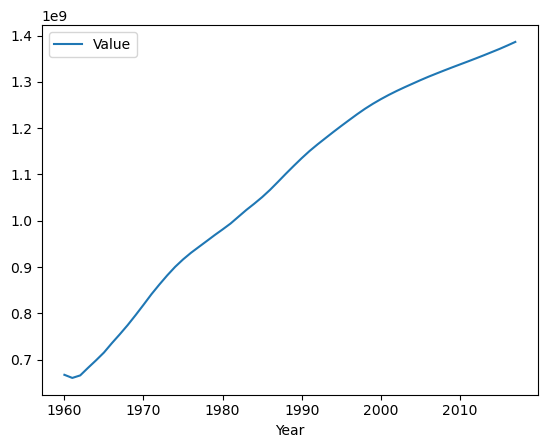

In [51]:
cn.plot(x="Year", y="Value")

# Data Cleaning

Let's start to explore doing some data cleaning - an important job when using real world data which is messy.

## Example 4

![iris image indicating petal and sepal structures in the flower](https://pages.mtu.edu/~lebrown/un5550-f20/week1/petal_sepal.jpg)

We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

![iris setosa image](https://pages.mtu.edu/~lebrown/un5550-f20/week1/iris_setosa.jpg)

### *Iris versicolor*
![iris versicolor image](https://pages.mtu.edu/~lebrown/un5550-f20/week1/iris_versicolor.jpg)

### *Iris virginica*
![iris virginica image](https://pages.mtu.edu/~lebrown/un5550-f20/week1/iris_virginica.jpg)

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

The data set, `iris-data-test.csv` is a slight modificaiton from the famous **Iris** data set.  It has been slightly modified from the publicly available version for demonstration purposes in this notebook. 

### Load the data 

In [52]:
# Read in local copy of the data
iris_data = pd.read_csv('iris-data-test.csv')
iris_data.head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,?,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


A first thing to notice is that this data set is like many real world data sets and has some missing values - ? on row 6 and NAN on row 7.

### Missing Data 

We can tell `pandas` to automatically identify missing values if we know that marker that is used to represent the missing values, e.g., NA, NAN, or others. 

In [53]:
iris_data = pd.read_csv('iris-data-test.csv', na_values=['NA', '?'])
iris_data.head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,NaN,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [54]:
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,2.3,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


We can look at the descriptive statistics of the variables: mean, standard deviation, quartiles, min, and max. 

In [55]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,151.000000,151.000000,151.000000,144.000000
mean,5.644993,3.059603,3.745033,1.244444
std,1.308406,0.435917,1.766491,0.751667
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.300000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's try to handle the missing values. First, we can drop the rows that containt the missing values (note, this is not something that you always want to do, depends on the size of your data, its distribution, ...).

In [56]:
iris2 = iris_data.dropna()
iris2

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,2.3,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


We can see that this process changed the number of rows from 151 to 146.

Second, let's try to replace the missing values. There are many techniques use to infer or interpolate what a missing value should be replaced with (more on this topic later in the course).

Today let's try a naive approach by replacing the missing values with the mean for that variable.

In [57]:
iris3 = iris_data.copy()
iris3.head(12)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,NaN,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


As for most things in Python there are many methods to do this.  First, writing our own approach: find the rows where there are missing values, then replace the values with the mean for that variable. 

In [58]:
# Get rows where there are missing values
mv = iris3[iris3['petal_width_cm'].isnull()].index.tolist()
mv

[6, 7, 8, 9, 10, 11, 12]

In [59]:
# Replace the values with the mean for that variable.
iris3.iloc[mv, 3] = iris3['petal_width_cm'].mean()
iris3.head(12)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.200000,Iris-setosa
1,4.9,3.0,1.4,0.200000,Iris-setosa
2,4.7,3.2,1.3,0.200000,Iris-setosa
3,4.6,3.1,1.5,0.200000,Iris-setosa
4,5.0,3.6,1.4,0.200000,Iris-setosa
5,5.4,3.9,1.7,0.400000,Iris-setosa
6,4.6,3.4,1.4,1.244444,Iris-setosa
7,5.0,3.4,1.5,1.244444,Iris-setosa
8,4.4,2.9,1.4,1.244444,Iris-setosa
9,4.9,3.1,1.5,1.244444,Iris-setosa


We could also use functions in Python packages. Let's do this and replace the missing values with the median for that variable.

In [60]:
iris4 = iris_data.copy()
iris4 = iris4.fillna(iris3['petal_width_cm'].median())
iris4.head(12)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,1.3,Iris-setosa
7,5.0,3.4,1.5,1.3,Iris-setosa
8,4.4,2.9,1.4,1.3,Iris-setosa
9,4.9,3.1,1.5,1.3,Iris-setosa


### Other errors in Data

Let's walk some other issues in the data.

There are five classes when there should only be three, meaning there were some coding errors.

In [61]:
iris4['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

It looks like someone forgot to add "Iris-" before some of the "Iris-versicolor" entries. Also, there looks like a misspelling of "Iris-setosa".

In [62]:
iris4.loc[iris4['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris4.loc[iris4['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris4['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualizations 

Let's explore more functions to help create plots. 

We will be using the matplotlib library. If you are familiar with the plotting functions in Matlab, you will see that this library has extremely similar function calls.

If you are new to generating plots in Python, please review the examples given in the textbook as well as some examples using the pandas library. https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Example 5 

We are going to be using the Iris data set again, but we will be using a "clean" version that is publically available.  

This code also shows how we can read in data directly from the web (not a file stored on the local machine).

In [63]:
colNames = ['slen', 'swid', 'plen', 'pwid', 'type']
df = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None,
                   sep=',',
                   names=colNames)
df.head(5)

,slen,swid,plen,pwid,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Histograms 

Let's examine the distribution of values for sepal length - `slen`

array([[<Axes: title={'center': 'slen'}>]], dtype=object)

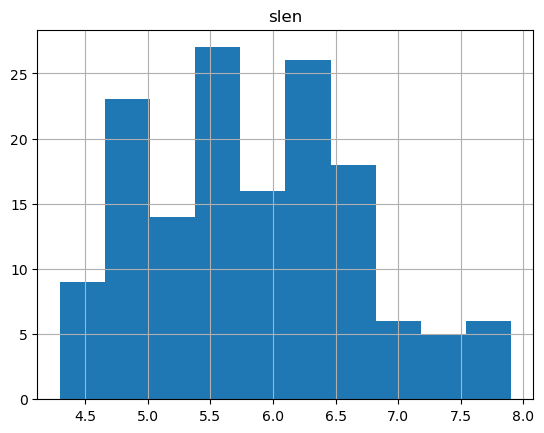

In [64]:
df.hist(column='slen')

We can change some of the plotting options. For example, the number of bins in the histogram.

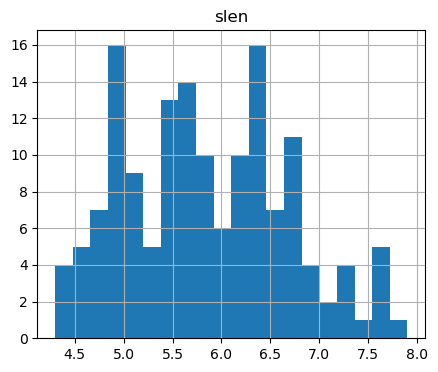

In [65]:
df.hist(column='slen',    # Column to plot
        figsize=(5, 4),   # Plot size
        bins=20);          # Number of bins

We can look at the histogram for another column (variable).

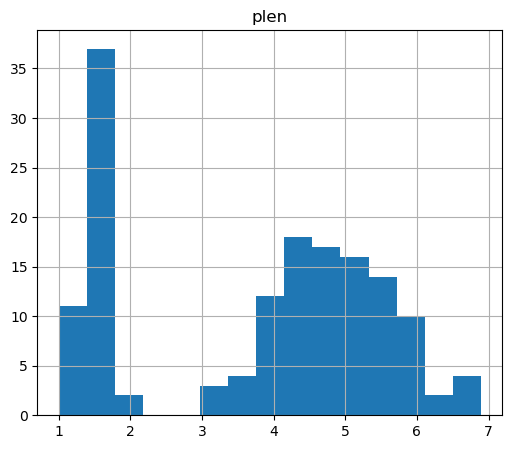

In [66]:
df.hist(column='plen',    # Column to plot
        figsize=(6, 5),   # Plot size
        bins=15);          # Number of histogram bins

Let's now add some additional elements that **should be on all plots - axes labels and titles**.

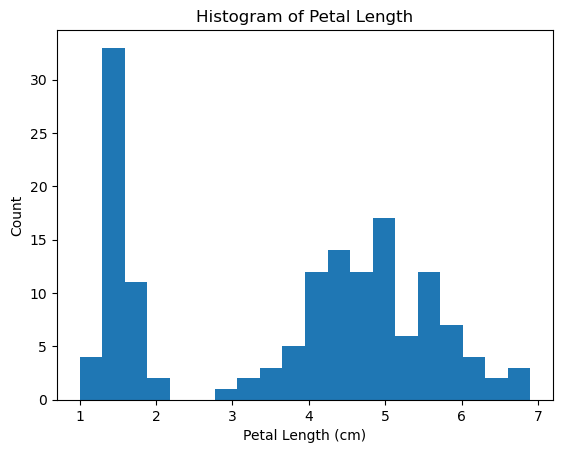

In [67]:
plt.hist(df['plen'], bins=20)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.title('Histogram of Petal Length')
plt.show()

### Boxplots 

Box plots are used to compactly show many pieces of information about a variable distribution including some summary statistics. 

<Axes: >

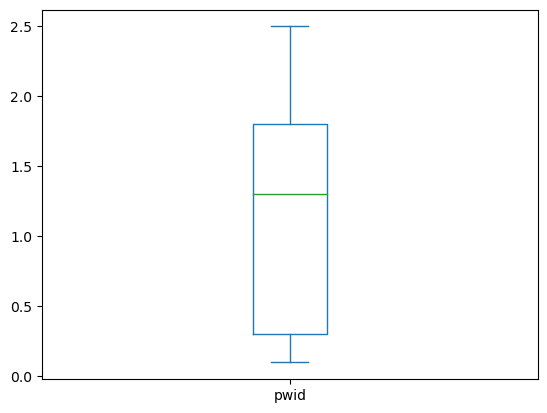

In [68]:
df['pwid'].plot(kind='box')

<Axes: >

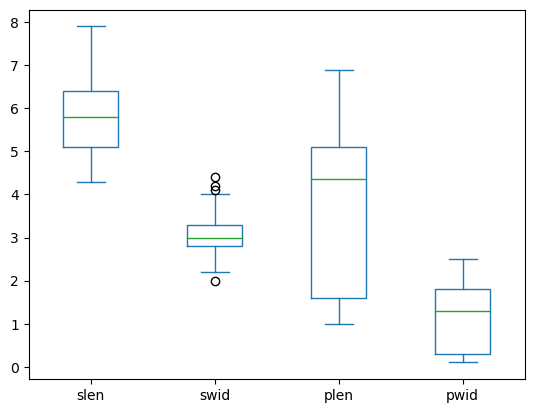

In [69]:
df.plot.box()

Let's change how the plot looks. 

We may want our plots to look like they were generated with Matlab (above) or with R (below) or some other design. 

<Axes: >

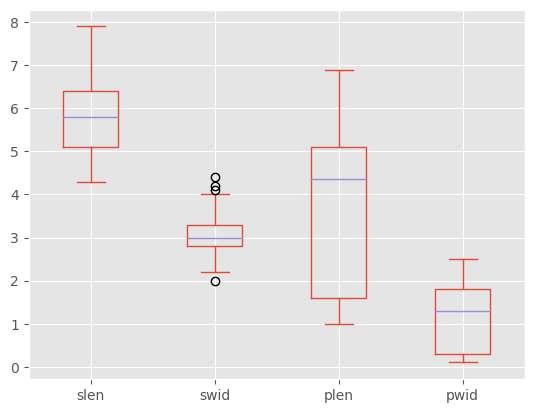

In [70]:
mpl.style.use('ggplot')
df.plot.box()

This plot now looks like it was created using R.

There are many other styles available which you can investigate how they look.

In [71]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: >

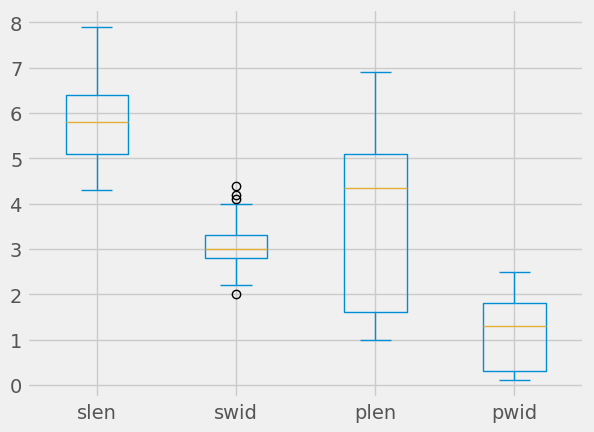

In [72]:
mpl.style.use('fivethirtyeight')
df.plot.box()